In [1]:
import torch
from dataset import SatelliteDataset
import matplotlib.pyplot as plt
import numpy as np
from datautils import unprocess, create_img_from_classes

In [32]:
ds = SatelliteDataset("../../data/val")
loader = torch.utils.data.DataLoader(ds, 1)

In [41]:
def calc_class_split(classes, ax = None):
    b = torch.flatten(classes, 1)
    c = torch.argmax(b,0)
    split = []
    for cla in range(14):
        split.append(c[c == cla].size()[0] / c.size()[0])
    if ax:
        ax.bar(list(range(14)), split)
    else:
        plt.figure()
        plt.bar(list(range(14)),split)
    most_common_class = np.argmax(split)
    print("most common class", most_common_class)

most common class 1


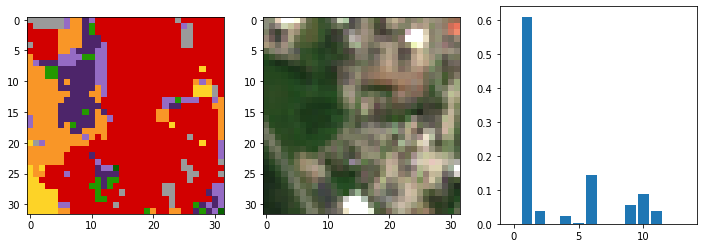

In [45]:
size = 32
for rgb_a, rgb_b, rgb_ab, lc_a, lc_b, lc_ab in loader:
    #calc_class_split(lc_b[0])
    #calc_class_split(lc_a[0])
    
    lc_aup = unprocess(lc_a, False)
    lc_aup = create_img_from_classes(lc_aup)
    rgb_a = unprocess(rgb_a)
    
    
    r_w = np.random.randint(256 - size)
    r_h = np.random.randint(256 - size)
    
    mlc = lc_aup[r_w:r_w+size, r_h:r_h + size, :]
    mrgb_a = rgb_a[r_w:r_w+size, r_h:r_h + size, :]
    
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].imshow(mlc)
    ax[1].imshow(mrgb_a)
    calc_class_split(lc_a[0,:,r_w:r_w+size, r_h:r_h + size], ax[2])
    
    break

In [2]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'vgg16', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to C:\Users\hugih/.cache\torch\hub\v0.9.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\hugih/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [3]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
img = torch.randn((1, 3, 256, 256))

In [6]:
out = model(img)

In [7]:
out.shape

torch.Size([1, 1000])

In [14]:
for m in model.modules():
    print(m)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
relu1_2 = torch.nn.Sequential(*model.features[:4])
relu2_2 = torch.nn.Sequential(*model.features[:9])
relu3_3 = torch.nn.Sequential(*model.features[:16])
relu4_3 = torch.nn.Sequential(*model.features[:23])

In [31]:
relu4_4(img).shape

torch.Size([1, 512, 32, 32])

In [29]:
relu4_3

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si